# Extrovert vs. Introvert Behavior Data

# Goal of the data



  The goal of this dataset is to explore and analyze personality traits, specifically focusing on the distinction between extroversion and introversion, using behavioral and social indicators. It contains data on individual behaviors such as time spent alone, attendance at social events, and engagement on social media platforms. This information provides valuable insights into how people interact with their social environments. The dataset is ideal for performing exploratory data analysis (EDA) to uncover patterns and correlations related to personality traits. It can be used for various applications in psychology, sociology, marketing, and machine learning. By analyzing this dataset, one can identify trends, make personality predictions, and support research into social behavior and personality classification.

# About the data:

  This dataset contains 2,900 rows and 8 columns, capturing behavioral and social data related to personality traits. It includes key indicators of extroversion and introversion, such as time spent alone, social event participation, and social media activity, making it useful for personality analysis and social behavior studies.

  

https://www.kaggle.com/datasets/rakeshkapilavai/extrovert-vs-introvert-behavior-data

# Target : Personality

# Libraries

In [ ]:
#
#Data Wrangling and manipulation
#
import numpy as np #for numerical computations and array operations
import pandas as pd # for handling and manipuilating structured data.
#
#data visualization
#
import matplotlib.pyplot as plt #for basic plotting
import seaborn as sns #for advanced statistical visualizations
#
#data preprocessing & feature engineering
#
from sklearn.preprocessing import StandardScaler #standardization (mean=0,variable=1)
from sklearn.preprocessing import MinMaxScaler #normalization (scales data between 0 and 1 )
from sklearn.preprocessing import LabelEncoder #encodes categorical label as numbers
from sklearn.preprocessing import OneHotEncoder #converts categorical feature to one-hot encoding
from sklearn.impute import SimpleImputer#handles missing values
#
#dimensionally reduction & feature selection
#
from sklearn.decomposition import PCA #principal componenet analysis for dimensionality reduction
from sklearn.feature_selection import SelectKBest, f_classif #feature selection techniques
#
#model selection and evaluation
#
from sklearn.model_selection import train_test_split #splits dataset into training and test sets
from sklearn.model_selection import cross_validate #performs cross-validation
from sklearn.model_selection import KFold #K-Fold cross-validation
from sklearn.model_selection import GridSearchCV #Hyperparameter tuning using grid search
#
#performance metrics
#
from sklearn.metrics import accuracy_score #evaluates model accuracy
from sklearn.metrics import confusion_matrix #computes confusion matrix
from sklearn.metrics import classification_report #precision ,recall,F1-score summary
from sklearn.metrics import precision_score #precision metric
from sklearn.metrics import roc_auc_score #AUC-ROC score for evaluating classifiers
from sklearn import metrics # collection of evaluation metrics
#
#Handling imbalanced datasets
#
from imblearn.over_sampling import SMOTE #synthetic minority over-sampling technique(for handling class imbalance)
from sklearn.utils import class_weight #assigns weights to imbalanced classes
#
#Machine Learning Algorithms- classifications
#
from sklearn.linear_model import LogisticRegression #Logistic Regression model
from sklearn.neighbors import KNeighborsClassifier #K-Nearest neighbors classifier
from sklearn.svm import SVC #support vector classifier
from sklearn.ensemble import RandomForestClassifier #random vector classifier
from sklearn.naive_bayes import GaussianNB #naive  bayes classifier
from xgboost import XGBClassifier #extreme gradient boosting classifier
from sklearn.tree import DecisionTreeClassifier #desicion tree classifier
from sklearn.ensemble import ExtraTreesClassifier #extra trees classifier
from sklearn.linear_model import SGDClassifier #stochastic Gradient Descent classifier
#
#Utility Functions
#
from sklearn.pipeline import make_pipeline #create machine learning pipelines
from sklearn.datasets import make_classification #generates synthetic classification datasets
from sklearn import model_selection #various model selection utilities
from sklearn import svm #support vector machines module
from sklearn import tree # decision tree-related utilities


#reading the dataset

In [ ]:
df=pd.read_csv("/content/personality_dataset.csv")
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,NaN,Yes,2.0,0.0,Introvert


#Basic understanding of data

In [ ]:
df.shape

(2900, 8)

In [ ]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [ ]:
df.tail()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,NaN,Yes,2.0,0.0,Introvert
2899,3.0,No,6.0,6.0,No,6.0,9.0,Extrovert


In [ ]:
df.sample()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
2370,9.0,Yes,1.0,2.0,Yes,1.0,2.0,Extrovert


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [ ]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [ ]:
df.describe(include=['O'])

,Stage_fear,Drained_after_socializing,Personality
count,2827,2848,2900
unique,2,2,2
top,No,No,Extrovert
freq,1417,1441,1491


# visualizations of the features

## Personality Distribution

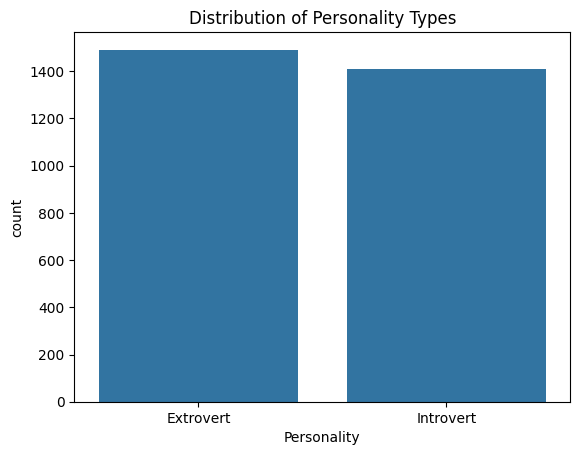

In [ ]:
sns.countplot(data=df, x='Personality')
plt.title('Distribution of Personality Types')
plt.show()


## Stage Fear by Personality

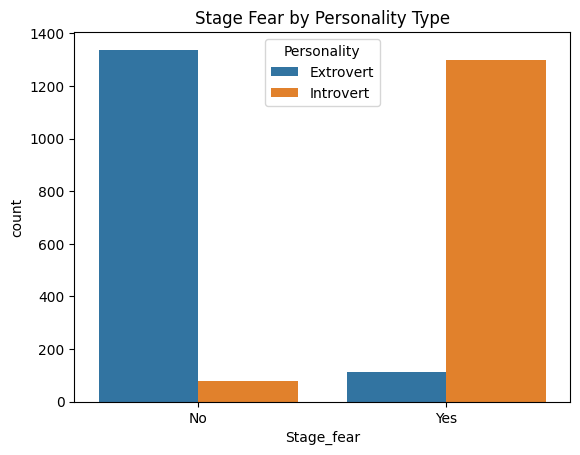

In [ ]:
sns.countplot(data=df, x='Stage_fear', hue='Personality')
plt.title('Stage Fear by Personality Type')
plt.show()


## Time Spent Alone (Histogram with KDE)

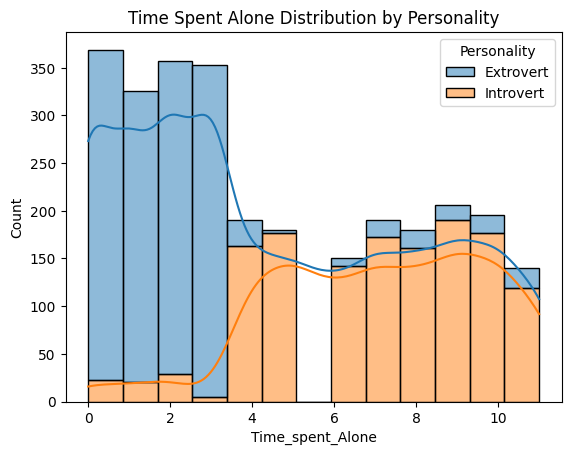

In [ ]:
sns.histplot(data=df, x='Time_spent_Alone', kde=True, hue='Personality', multiple="stack")
plt.title('Time Spent Alone Distribution by Personality')
plt.show()


## Social Event Attendance (Boxplot)

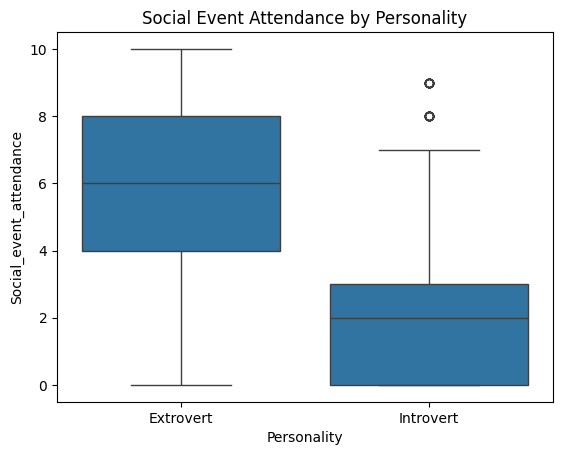

In [ ]:
sns.boxplot(data=df, x='Personality', y='Social_event_attendance')
plt.title('Social Event Attendance by Personality')
plt.show()


## Friends Circle Size (Boxplot)

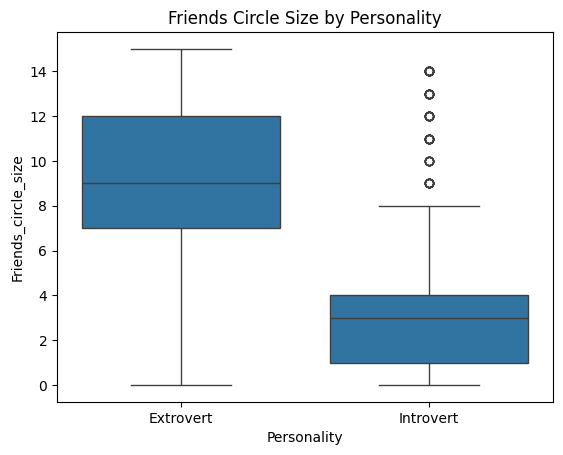

In [ ]:
sns.boxplot(data=df, x='Personality', y='Friends_circle_size')
plt.title('Friends Circle Size by Personality')
plt.show()


## Post Frequency (Boxplot)

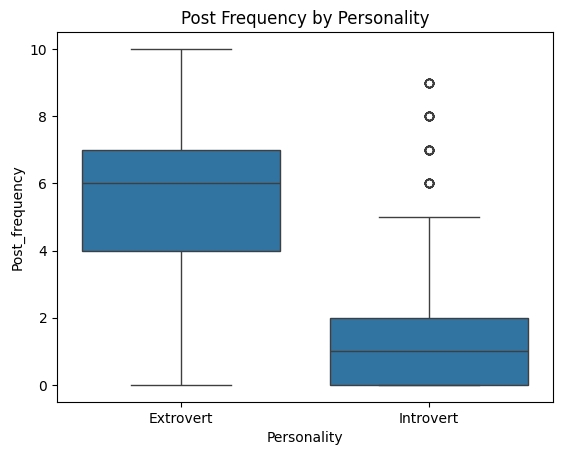

In [ ]:
sns.boxplot(data=df, x='Personality', y='Post_frequency')
plt.title('Post Frequency by Personality')
plt.show()


## Correlation Heatmap

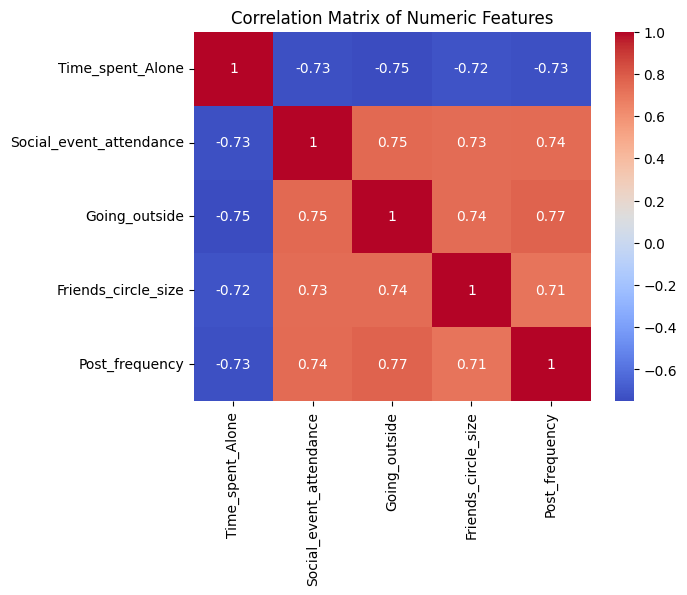

In [ ]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()


# Data Cleaning

## handling duplicates / Null values

In [ ]:
df.duplicated().sum()

np.int64(388)

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.describe()
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2512 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2451 non-null   float64
 1   Stage_fear                 2439 non-null   object 
 2   Social_event_attendance    2451 non-null   float64
 3   Going_outside              2447 non-null   float64
 4   Drained_after_socializing  2461 non-null   object 
 5   Friends_circle_size        2437 non-null   float64
 6   Post_frequency             2449 non-null   float64
 7   Personality                2512 non-null   object 
dtypes: float64(5), object(3)
memory usage: 176.6+ KB


In [ ]:
df.isnull().sum()


,0
Time_spent_Alone,61
Stage_fear,73
Social_event_attendance,61
Going_outside,65
Drained_after_socializing,51
Friends_circle_size,75
Post_frequency,63
Personality,0


In [ ]:
# Fill numeric columns with mean
df['Time_spent_Alone'].fillna(df['Time_spent_Alone'].mean(), inplace=True)
df['Social_event_attendance'].fillna(df['Social_event_attendance'].mean(), inplace=True)
df['Going_outside'].fillna(df['Going_outside'].mean(), inplace=True)
df['Friends_circle_size'].fillna(df['Friends_circle_size'].mean(), inplace=True)
df['Post_frequency'].fillna(df['Post_frequency'].mean(), inplace=True)
# Alternatively, you can use median if data is skewed
# la['column_name'].fillna(la['column_name'].median(), inplace=True)

<ipython-input-21-125284752>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Time_spent_Alone'].fillna(df['Time_spent_Alone'].mean(), inplace=True)
<ipython-input-21-125284752>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time_spent_Alone'].fillna(df['Time_spent_Alone'].mean(), inplace=True)
<ipython-input-21-125284752>:3: FutureW

In [ ]:
# Fill categorical Yes/No columns with most frequent value (mode)
df['Stage_fear'].fillna(df['Stage_fear'].mode()[0], inplace=True)
df['Drained_after_socializing'].fillna(df['Drained_after_socializing'].mode()[0], inplace=True)


<ipython-input-22-2365001954>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Stage_fear'].fillna(df['Stage_fear'].mode()[0], inplace=True)
<ipython-input-22-2365001954>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Stage_fear'].fillna(df['Stage_fear'].mode()[0], inplace=True)
<ipython-input-22-2365001954>:3: FutureWarning: A value

In [ ]:
# Also check target column
df['Personality'].fillna(df['Personality'].mode()[0], inplace=True)

<ipython-input-23-2346353888>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Personality'].fillna(df['Personality'].mode()[0], inplace=True)
<ipython-input-23-2346353888>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Personality'].fillna(df['Personality'].mode()[0], inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2512 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2512 non-null   float64
 1   Stage_fear                 2512 non-null   object 
 2   Social_event_attendance    2512 non-null   float64
 3   Going_outside              2512 non-null   float64
 4   Drained_after_socializing  2512 non-null   object 
 5   Friends_circle_size        2512 non-null   float64
 6   Post_frequency             2512 non-null   float64
 7   Personality                2512 non-null   object 
dtypes: float64(5), object(3)
memory usage: 176.6+ KB


In [ ]:
df.duplicated().sum()

np.int64(9)

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2503 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2503 non-null   float64
 1   Stage_fear                 2503 non-null   object 
 2   Social_event_attendance    2503 non-null   float64
 3   Going_outside              2503 non-null   float64
 4   Drained_after_socializing  2503 non-null   object 
 5   Friends_circle_size        2503 non-null   float64
 6   Post_frequency             2503 non-null   float64
 7   Personality                2503 non-null   object 
dtypes: float64(5), object(3)
memory usage: 176.0+ KB


# Encoding

In [ ]:
# After Encoding, all your columns will be numeric and suitable for machine learning models or correlation analysis.

df['Stage_fear'] = df['Stage_fear'].map({'Yes': 1, 'No': 0})
df['Drained_after_socializing'] = df['Drained_after_socializing'].map({'Yes': 1, 'No': 0})
df['Personality'] = df['Personality'].map({'Introvert': 1, 'Extrovert': 0})

<ipython-input-28-2896791309>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Stage_fear'] = df['Stage_fear'].map({'Yes': 1, 'No': 0})
<ipython-input-28-2896791309>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Drained_after_socializing'] = df['Drained_after_socializing'].map({'Yes': 1, 'No': 0})
<ipython-input-28-2896791309>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

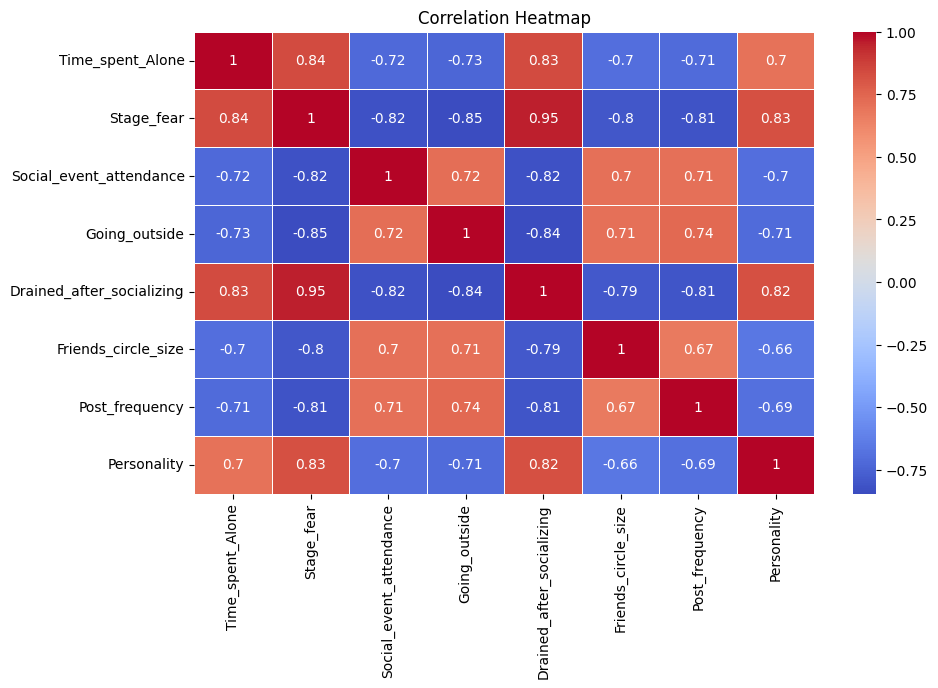

In [ ]:
#Check correlations between features
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#Data Transformations-Numerical data analysis

## outliers

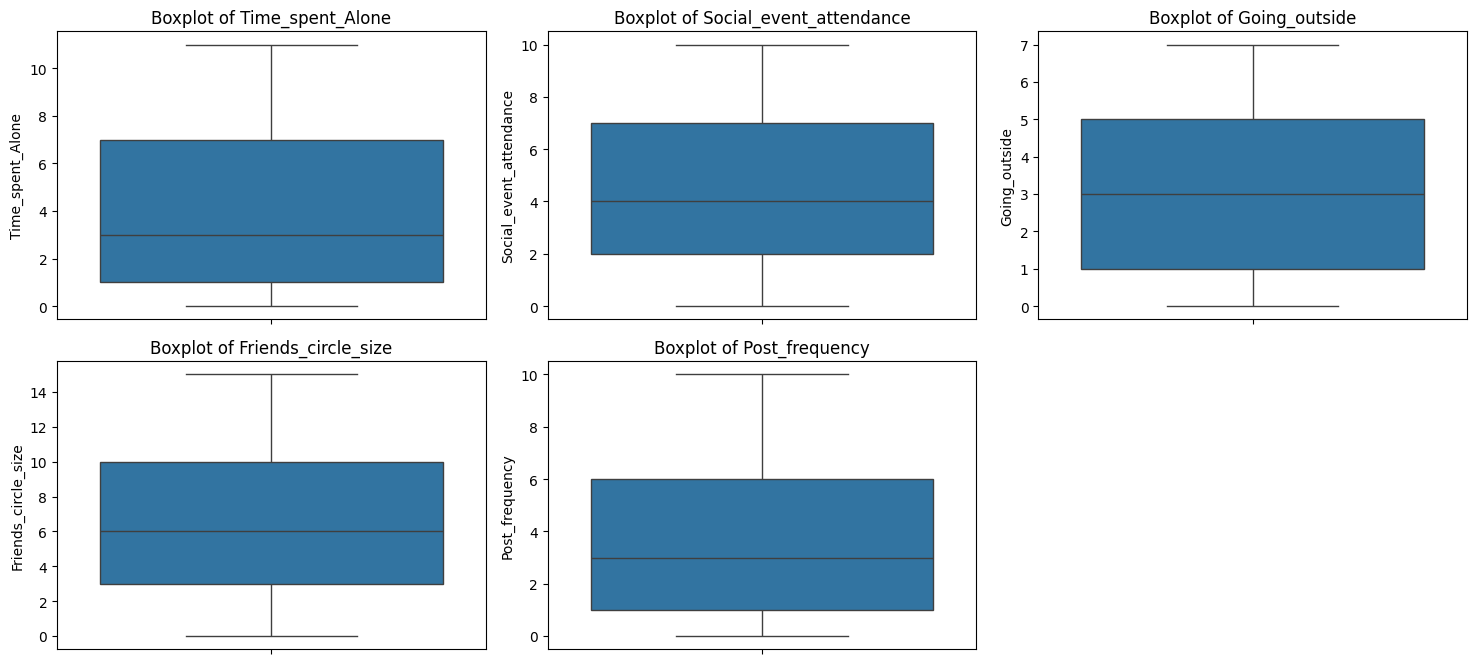

In [ ]:
# Plot boxplots for all numerical features
numerical_cols = df.select_dtypes(include='float64').columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

no outliers

## scaling

In [ ]:
#Create the copy of orginal data for comparison
scaled_df=df.copy()
#select numeric columns,excluding 'LoanApproved'
numeric_columns=scaled_df.drop(columns=['Personality']).select_dtypes(include=['number']).columns
#initialize the standardscaler
scaler=StandardScaler()
#apply the scaler only to the numeric columns
scaled_df[numeric_columns]=scaler.fit_transform(df[numeric_columns])
scaled_df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,-0.064761,-0.879012,-0.073732,1.264536,-0.877585,1.504098,0.402999,0
1,1.404119,1.137640,-1.465619,-1.443119,1.139491,-1.549528,-0.283284,1
2,1.404119,1.137640,-1.117647,-0.540567,1.139491,-0.375057,-0.626425,1
3,-1.239864,-0.879012,0.622211,1.715811,-0.877585,1.738993,1.432423,0
4,-0.358537,-0.879012,1.666126,0.361984,-0.877585,0.329627,0.402999,0


# Model-Training and Evaluation

`before scaling`

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('Personality', axis=1)
y = df['Personality']

# Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Create model instances
log_reg = LogisticRegression(max_iter=1000, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)

# Fit (train) the models
log_reg.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def evaluate(model, name):
    y_pred = model.predict(X_test)
    print(f"\n{name} Accuracy:", round(accuracy_score(y_test, y_pred), 3))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
# Evaluate both models
evaluate(log_reg, "Logistic Regression")
evaluate(rf_clf, "Random Forest")


Logistic Regression Accuracy: 0.928
Confusion Matrix:
 [[263  19]
 [ 17 202]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94       282
           1       0.91      0.92      0.92       219

    accuracy                           0.93       501
   macro avg       0.93      0.93      0.93       501
weighted avg       0.93      0.93      0.93       501


Random Forest Accuracy: 0.912
Confusion Matrix:
 [[261  21]
 [ 23 196]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       282
           1       0.90      0.89      0.90       219

    accuracy                           0.91       501
   macro avg       0.91      0.91      0.91       501
weighted avg       0.91      0.91      0.91       501



`after scaling`

In [ ]:
X = scaled_df.drop('Personality', axis=1)
y = df['Personality']  # Use original 'Personality' if it's categorical or unchanged


In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = scaled_df.drop('Personality', axis=1)
y = scaled_df['Personality']

# Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Create model instances
log_reg = LogisticRegression(max_iter=1000, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)

# Fit (train) the models
log_reg.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def evaluate(model, name):
    y_pred = model.predict(X_test)
    print(f"\n{name} Accuracy:", round(accuracy_score(y_test, y_pred), 3))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
# Evaluate both models
evaluate(log_reg, "Logistic Regression")
evaluate(rf_clf, "Random Forest")


Logistic Regression Accuracy: 0.918
Confusion Matrix:
 [[263  19]
 [ 22 197]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       282
           1       0.91      0.90      0.91       219

    accuracy                           0.92       501
   macro avg       0.92      0.92      0.92       501
weighted avg       0.92      0.92      0.92       501


Random Forest Accuracy: 0.914
Confusion Matrix:
 [[262  20]
 [ 23 196]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       282
           1       0.91      0.89      0.90       219

    accuracy                           0.91       501
   macro avg       0.91      0.91      0.91       501
weighted avg       0.91      0.91      0.91       501



`the best model is before scaling.`

#Model Building

## Best classification model

Training and EvaluatingLogistic Regression...
Accuracy:0.9182

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       282
           1       0.91      0.90      0.91       219

    accuracy                           0.92       501
   macro avg       0.92      0.92      0.92       501
weighted avg       0.92      0.92      0.92       501



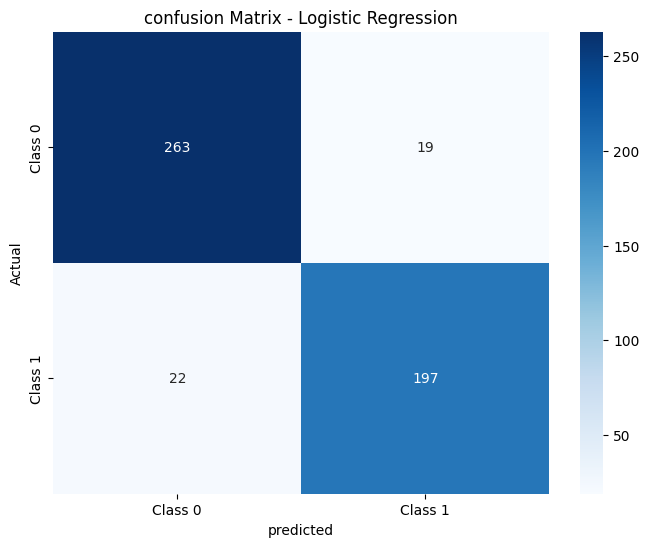

--------------------------------------------------------------------------------
Training and EvaluatingRandom Forest...
Accuracy:0.9122

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       282
           1       0.91      0.89      0.90       219

    accuracy                           0.91       501
   macro avg       0.91      0.91      0.91       501
weighted avg       0.91      0.91      0.91       501



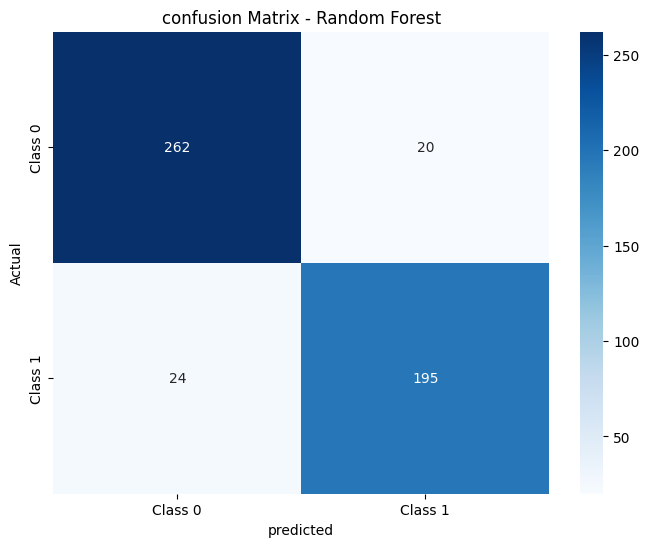

--------------------------------------------------------------------------------
Training and EvaluatingDecision Tree...
Accuracy:0.8483

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       282
           1       0.84      0.81      0.82       219

    accuracy                           0.85       501
   macro avg       0.85      0.84      0.85       501
weighted avg       0.85      0.85      0.85       501



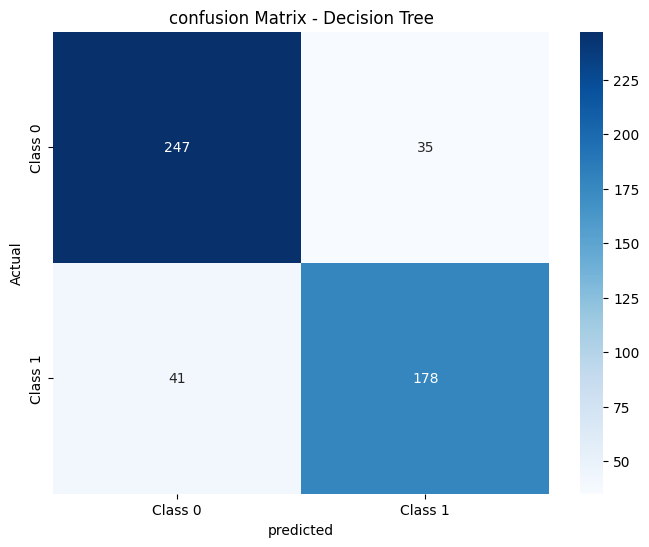

--------------------------------------------------------------------------------
Training and EvaluatingK-Nearest Neighbors...
Accuracy:0.9321

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       282
           1       0.91      0.93      0.92       219

    accuracy                           0.93       501
   macro avg       0.93      0.93      0.93       501
weighted avg       0.93      0.93      0.93       501



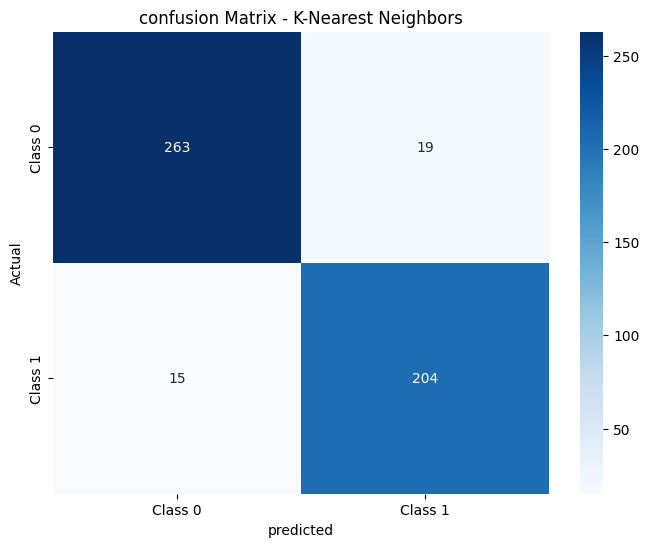

--------------------------------------------------------------------------------
Training and EvaluatingExtra Trees...
Accuracy:0.9082

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       282
           1       0.90      0.89      0.89       219

    accuracy                           0.91       501
   macro avg       0.91      0.91      0.91       501
weighted avg       0.91      0.91      0.91       501



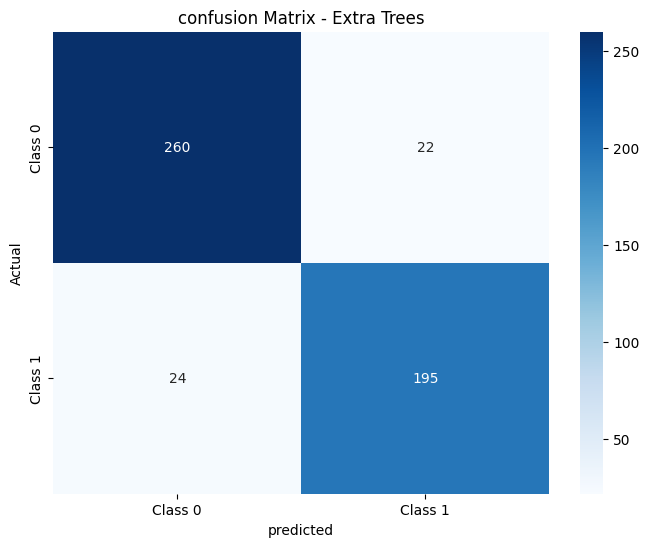

--------------------------------------------------------------------------------
Training and Evaluatingsvm...
Accuracy:0.9242

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       282
           1       0.91      0.91      0.91       219

    accuracy                           0.92       501
   macro avg       0.92      0.92      0.92       501
weighted avg       0.92      0.92      0.92       501



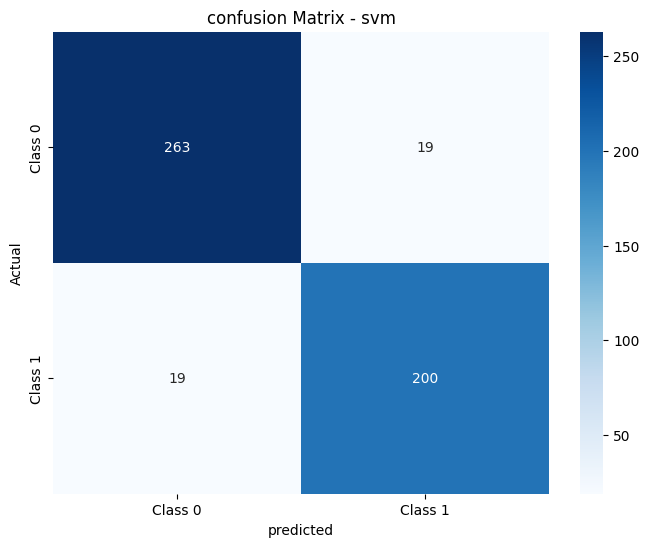

--------------------------------------------------------------------------------


<ipython-input-41-1825857595>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies,palette='viridis')


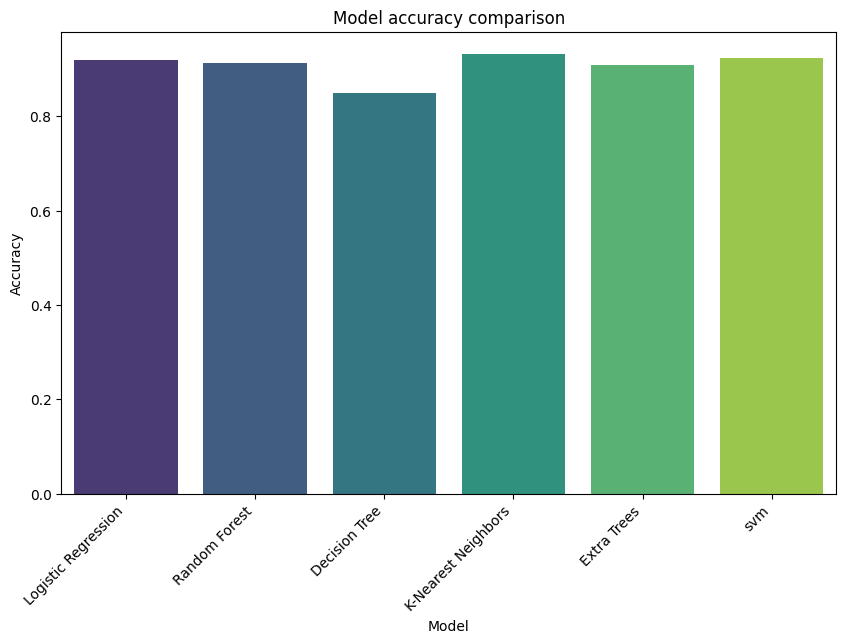

In [ ]:
#define models to evaluate
models={
    'Logistic Regression':LogisticRegression(),
    'Random Forest':RandomForestClassifier(),
    'Decision Tree':DecisionTreeClassifier(),
    'K-Nearest Neighbors':KNeighborsClassifier(n_neighbors=11),
    'Extra Trees':ExtraTreesClassifier(),
    'svm':SVC(kernel='linear',probability=True)
}
#initialize a list to store model names and accuracies
model_accuracies=[]

#loop through models, train, and evaluate
for model_name,model in models.items():
 print(f'Training and Evaluating{model_name}...')

#Train the model
 model.fit(X_train,y_train)

#predictions
 y_pred=model.predict(X_test)

#accuracy
 accuracy=accuracy_score(y_test,y_pred)
 model_accuracies.append((model_name,accuracy))
 print(f'Accuracy:{accuracy:.4f}')

#Classification Report
 print("\nClassification Report:")
 print(classification_report(y_test,y_pred))

#confusion Matrix
 conf_matrix=confusion_matrix(y_test,y_pred)

#plot confusion matrix
 plt.figure(figsize=(8,6))
 sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',xticklabels=['Class 0','Class 1'],yticklabels=['Class 0','Class 1'])
 plt.title(f'confusion Matrix - {model_name}')
 plt.xlabel('predicted')
 plt.ylabel('Actual')
 plt.show()
 #seperate a line for readablity between models
 print("-"*80)
#plotting the accuracies of all models
model_names=[model_name for model_name,_ in model_accuracies]
accuracies=[accuracy for _, accuracy in model_accuracies]
#create a bar plot for accuracy comparison
plt.figure(figsize=(10,6))
sns.barplot(x=model_names, y=accuracies,palette='viridis')
plt.title('Model accuracy comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45,ha='right')
plt.show()

#pickle file

In [ ]:
import pickle
from sklearn.neighbors import KNeighborsClassifier

# Train the model (assuming x_train and y_train are already defined and preprocessed)
model = KNeighborsClassifier(n_neighbors=5)  # You can change the number of neighbors
model.fit(X_train, y_train)

# Save the trained model using pickle
with open('knn_model.pkl', 'wb') as file:
    pickle.dump(model, file)
    print("KNN model saved to 'knn_model.pkl'.")

KNN model saved to 'knn_model.pkl'.
